# Frequentist Inference Case Study - Part A 

## 1. Learning objectives

Welcome to part A of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. Frequentist inference is the process of deriving conclusions about an underlying distribution via the observation of data. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

## Prerequisites

To be able to complete this notebook, you are expected to have a basic understanding of:
* what a random variable is (p.400 of Professor Spiegelhalter's *The Art of Statistics, hereinafter AoS*)
* what a population, and a population distribution, are (p. 397 of *AoS*)
* a high-level sense of what the normal distribution is (p. 394 of *AoS*)
* what the t-statistic is (p. 275 of *AoS*)

Happily, these should all be concepts with which you are reasonably familiar after having read ten chapters of Professor Spiegelhalter's book, *The Art of Statistics*.

We'll try to relate the concepts in this case study back to page numbers in *The Art of Statistics* so that you can focus on the Python aspects of this case study. The second part (part B) of this case study will involve another, more real-world application of these tools. 

For this notebook, we will use data sampled from a known normal distribution. This allows us to compare our results with theoretical expectations.

## 2. An introduction to sampling from the normal distribution

First, let's explore the ways we can generate the normal distribution. While there's a fair amount of interest in [sklearn](https://scikit-learn.org/stable/) within the machine learning community, you're likely to have heard of [scipy](https://docs.scipy.org/doc/scipy-0.15.1/reference/index.html) if you're coming from the sciences. For this assignment, you'll use [scipy.stats](https://docs.scipy.org/doc/scipy-0.15.1/reference/tutorial/stats.html) to complete your work. 

This assignment will require some digging around and getting your hands dirty (your learning is maximized that way)! You should have the research skills and the tenacity to do these tasks independently, but if you struggle, reach out to your immediate community and your mentor for help. 

In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

__Q1:__ Call up the documentation for the `norm` function imported above. (Hint: that documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)). What is the second listed method?

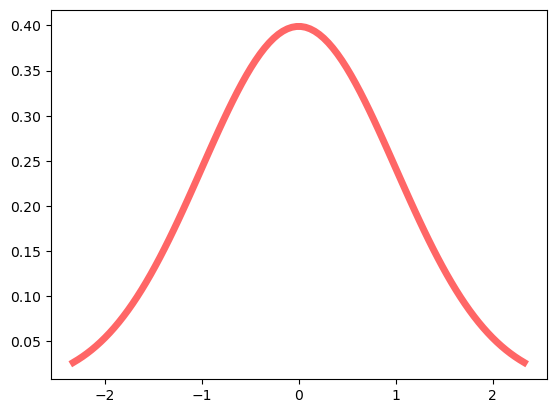

In [2]:
# Display the probability density function (pdf):
# np.linspace() is a function that returns evenly spaced numbers over a specified interval. 
# In this case, it is creating a sequence of 100 numbers that are evenly spaced between the 0.01 and 0.99 quantiles of a standard normal distribution.
# norm.ppf() is a function that returns the quantile function of a normal distribution. 
# In this case, it is converting the quantiles from the previous step into values on the real number line.
# norm.pdf() is a function that returns the probability density function of a normal distribution. 
# In this case, it is calculating the probability density at each of the values from the previous step.
# plt.plot() is a function that plots a line on an axes object. In this case, it is plotting the probability density function from the previous step.
# Here we are plotting the probability density function of a standard normal distribution. 
# The standard normal distribution is a probability distribution that is symmetric about 0, has a mean of 0, and a standard deviation of 1. 
# The probability density function of a normal distribution is a measure of how likely each value is to occur. 
# The higher the probability density at a particular value, the more likely that value is to occur.

x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
plt.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

__A:__

The second listed method is using the numpy and matplotlib libraries in Python to generate a probability density function (PDF) plot of a normal distribution.

Specifically, the code does the following:

It generates an array of 100 evenly spaced values between the 1st and 99th percentiles of a standard normal distribution using the numpy function linspace() and the norm.ppf() function, which is the inverse of the cumulative distribution function (CDF) of a normal distribution.

It then plots the values of the normal PDF at those x values using matplotlib's plot() function, with the line style set to 'r-' (red line), line width set to 5, and transparency set to 0.6. The label 'norm pdf' is also added for the legend.

Overall, the code is generating a visualization of the normal distribution's PDF using matplotlib and nympy libraries.

__Q2:__ Use the method that generates random variates to draw five samples from the standard normal distribution. 

__A:__

In [3]:
seed(47)
# Generate/draw five samples here call it r
r = norm.rvs(size=5)
print(r)

[-0.84800948  1.30590636  0.92420797  0.6404118  -1.05473698]


__Q3:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution. If you want a reminder of the properties of this distribution, check out p. 85 of *AoS*. 

__A:__

In [4]:
# Calculate and print the mean here, hint: use np.mean()
np.mean(r)

0.19355593334131074

__Q4:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$ (This is just the definition of **standard deviation** given by Professor Spiegelhalter on p.403 of *AoS*). Hint: np.sqrt() and np.sum() will be useful here and remember that numPy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

__A:__

In [5]:
# Sample data
data = r

# Calculate sample mean
mean = np.mean(r)

# Sample size
n = len(r)

# Subtract the mean from each element of the sample data.
differenced_data = data - mean

# Square each element of the differenced data.
squared_data = differenced_data ** 2

# Sum the squared elements.
sum_of_squared_data = np.sum(squared_data)

# Divide the sum by the number of elements in the sample.
variance = sum_of_squared_data / n

# Take the square root of the variance.
standard_deviation = np.sqrt(variance)

# Print the result
print("Standard deviation of the population is ", standard_deviation)

Standard deviation of the population is  0.9606195639478641


In [6]:
# Use for loop to calculate standard deviation of sample

sum = 0
for i in range(len(r)):
    sum+= r[i]
mean_of_r = sum/len(r)
sum_of_squared_deviation = 0
for i in range(len(r)):
    sum_of_squared_deviation+= (r[i]- mean_of_r)**2
Standard_Deviation = ((sum_of_squared_deviation)/len(r))**0.5

print("Standard deviation of the population is ",Standard_Deviation)

Standard deviation of the population is  0.9606195639478641


In [7]:
# Use for loop to calculate standard deviation of sample
# Here we use the function pow() instead of **0.5

sum = 0
for i in range(len(r)):
    sum+= r[i]
mean_of_r = sum/len(r)
sum_of_squared_deviation = 0
for i in range(len(r)):
    sum_of_squared_deviation+= (r[i]- mean_of_r)**2
Standard_Deviation = pow(((sum_of_squared_deviation)/len(r)), 0.5)

print("Standard deviation of the population is ",Standard_Deviation)

Standard deviation of the population is  0.9606195639478641


Here we have calculated the actual standard deviation of a small data set (of size 5). But in this case, this small data set is actually a sample from our larger (infinite) population. In this case, the population is infinite because we could keep drawing our normal random variates until our computers die! 

In general, the sample mean we calculate will not be equal to the population mean (as we saw above). A consequence of this is that the sum of squares of the deviations from the _population_ mean will be bigger than the sum of squares of the deviations from the _sample_ mean. In other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). Scaling our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The consequence of this is that the $n$ in the denominator is replaced by $n-1$.

You can see Bessel's correction reflected in Professor Spiegelhalter's definition of **variance** on p. 405 of *AoS*.

__Q5:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

__A:__

In [8]:
# Sample data
data = r

# Calculate sample mean
mean = np.mean(r)

# Sample size
n = len(r)

# Subtract the mean from each element of the sample data.
differenced_data = data - mean

# Square each element of the differenced data.
squared_data = differenced_data ** 2

# Sum the squared elements.
sum_of_squared_data = np.sum(squared_data)

# Divide the sum by the number of elements in the sample.
variance = sum_of_squared_data / (n - 1)

# Take the square root of the variance.
std = np.sqrt(variance)

# Print the result
print("Sample standard deviation is ", std)

Sample standard deviation is  1.0740053227518152


__Q6:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

__A:__

In [9]:
np.std(r)

0.9606195639478641

**A:**
It returned the standard deviation of the population.

__Q7:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

__A:__

In [10]:
help(np.std)

Help on function std in module numpy:

std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>)
    Compute the standard deviation along the specified axis.
    
    Returns the standard deviation, a measure of the spread of a distribution,
    of the array elements. The standard deviation is computed for the
    flattened array by default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Calculate the standard deviation of these values.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the standard deviation is computed. The
        default is to compute the standard deviation of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a standard deviation is performed over
        multiple axes, instead of a single axis or all the axes as before.
    dtype : dtype, optional
        Type to use in computing the standard deviation. 

In [11]:
# Means Delta Degrees of Freedom.  The divisor used in calculations is ``N - ddof``, where ``N`` represents the number of elements.By default `ddof` is zero.
# The average squared deviation is typically calculated as ``x.sum() / N``, where ``N = len(x)``. If, however, `ddof` is specified, the divisor `N - ddof`` is used instead. 
# In standard statistical practice, ``ddof=1`` provides an unbiased estimator of the variance of the infinite population.
# ``ddof=0`` provides a maximum likelihood estimate of the variance for normally distributed variables. 
# The standard deviation computed in this function is the square root of the estimated variance, so even with ``ddof=1``, it will not be an unbiased estimate of the standard deviation per se.
np.std(r, ddof=1)

1.0740053227518152

**Clarification: Standard Deviation of the Sample vs Standard Deviation of the Population**

**_standard deviation of the sample_** = 1.0740053227518152

**_standard deviation of the population_** = 0.9606195639478641


The standard deviation of the sample and the standard deviation of the population **_are both measures of the variability or spread of a set of data. However, they differ in the data they are based on and the purposes they serve._**

The **standard deviation of the sample**, denoted by s, is a measure of the variability of a sample of data. **_It is calculated as the square root of the sum of squared deviations from the sample mean divided by the degrees of freedom (n-1). The sample standard deviation is an estimate of the population standard deviation, and it is used to quantify the amount of variability in the sample data._** It is also used to make inferences about the population parameters based on the sample statistics.

On the other hand, the **standard deviation of the population, _denoted by σ, is a measure of the variability of the entire population. It is calculated as the square root of the sum of squared deviations from the population mean divided by the total number of observations._** The population standard deviation is a parameter that describes the **_variability of the entire population_**, and it is used to make inferences about the population characteristics.

In summary, the sample standard deviation is an estimate of the population standard deviation, and it is used to make inferences about the population parameters based on the sample statistics, while the population standard deviation is a parameter that describes the variability of the entire population. The difference between the two is the data they are based on and the purposes they serve.

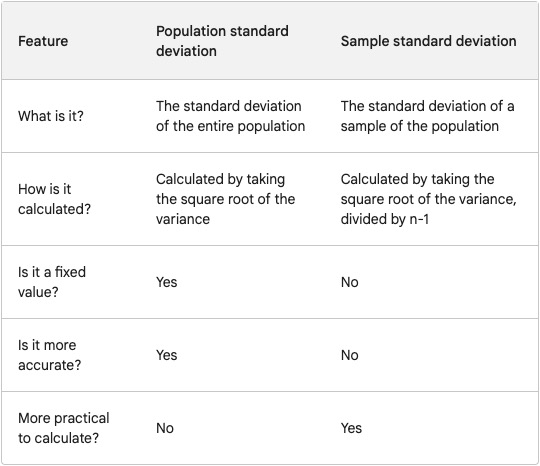

In [12]:
from IPython.display import Image
Image(filename='Standard Deviation of the Sample vs Standard Deviation of the Population.jpg')

### Summary of section

In this section, you've been introduced to the scipy.stats package and used it to draw a small sample from the standard normal distribution. You've calculated the average (the mean) of this sample and seen that this is not exactly equal to the expected population parameter (which we know because we're generating the random variates from a specific, known distribution). You've been introduced to two ways of calculating the standard deviation; one uses $n$ in the denominator and the other uses $n-1$ (Bessel's correction). You've also seen which of these calculations np.std() performs by default and how to get it to generate the other.

You use $n$ as the denominator if you want to calculate the standard deviation of a sequence of numbers. You use $n-1$ if you are using this sequence of numbers to estimate the population parameter. This brings us to some terminology that can be a little confusing.

The population parameter is traditionally written as $\sigma$ and the sample statistic as $s$. Rather unhelpfully, $s$ is also called the sample standard deviation (using $n-1$) whereas the standard deviation of the sample uses $n$. That's right, we have the sample standard deviation and the standard deviation of the sample and they're not the same thing!

The sample standard deviation
\begin{equation}
s = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}} \approx \sigma,
\end{equation}
is our best (unbiased) estimate of the population parameter ($\sigma$).

If your dataset _is_ your entire population, you simply want to calculate the population parameter, $\sigma$, via
\begin{equation}
\sigma = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}
\end{equation}
as you have complete, full knowledge of your population. In other words, your sample _is_ your population. It's worth noting that we're dealing with what Professor Spiegehalter describes on p. 92 of *AoS* as a **metaphorical population**: we have all the data, and we act as if the data-point is taken from a population at random. We can think of this population as an imaginary space of possibilities. 

If, however, you have sampled _from_ your population, you only have partial knowledge of the state of your population. In this case, the standard deviation of your sample is not an unbiased estimate of the standard deviation of the population, in which case you seek to estimate that population parameter via the sample standard deviation, which uses the $n-1$ denominator.

Great work so far! Now let's dive deeper.

## 3. Sampling distributions

So far we've been dealing with the concept of taking a sample from a population to infer the population parameters. One statistic we calculated for a sample was the mean. As our samples will be expected to vary from one draw to another, so will our sample statistics. If we were to perform repeat draws of size $n$ and calculate the mean of each, we would expect to obtain a distribution of values. This is the sampling distribution of the mean. **The Central Limit Theorem (CLT)** tells us that such a distribution will approach a normal distribution as $n$ increases (the intuitions behind the CLT are covered in full on p. 236 of *AoS*). For the sampling distribution of the mean, the standard deviation of this distribution is given by

\begin{equation}
\sigma_{mean} = \frac{\sigma}{\sqrt n}
\end{equation}

where $\sigma_{mean}$ is the standard deviation of the sampling distribution of the mean and $\sigma$ is the standard deviation of the population (the population parameter).

This is important because typically we are dealing with samples from populations and all we know about the population is what we see in the sample. From this sample, we want to make inferences about the population. We may do this, for example, by looking at the histogram of the values and by calculating the mean and standard deviation (as estimates of the population parameters), and so we are intrinsically interested in how these quantities vary across samples. 

In other words, now that we've taken one sample of size $n$ and made some claims about the general population, what if we were to take another sample of size $n$? Would we get the same result? Would we make the same claims about the general population? This brings us to a fundamental question: _when we make some inference about a population based on our sample, how confident can we be that we've got it 'right'?_

We need to think about **estimates and confidence intervals**: those concepts covered in Chapter 7, p. 189, of *AoS*.

Now, the standard normal distribution (with its variance equal to its standard deviation of one) would not be a great illustration of a key point. Instead, let's imagine we live in a town of 50,000 people and we know the height of everyone in this town. We will have 50,000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

In [13]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

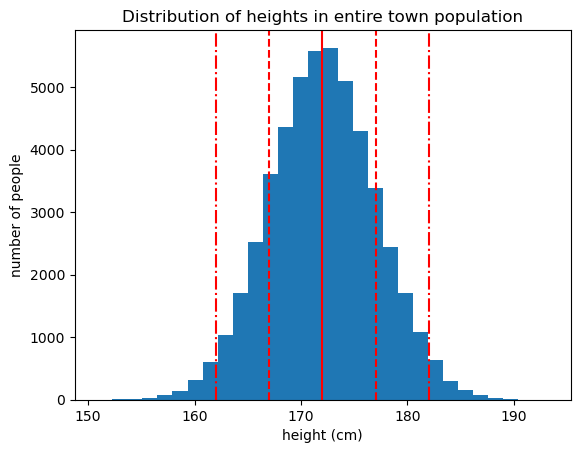

In [14]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

Now, 50,000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [15]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

Let's say you go out one day and randomly sample 10 people to measure.

In [16]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

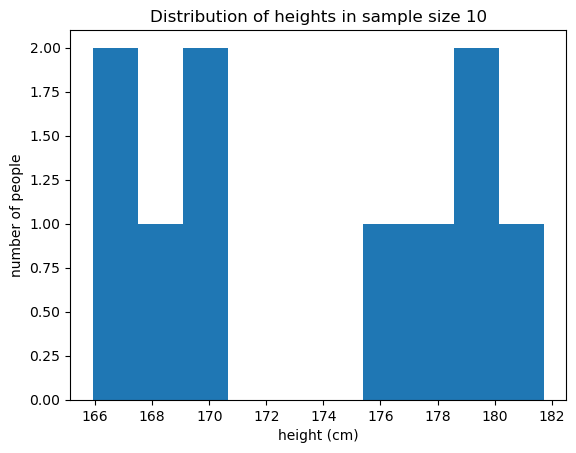

In [17]:
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

The sample distribution doesn't resemble what we take the population distribution to be. What do we get for the mean?

In [18]:
np.mean(daily_sample1)

173.47911444163503

And if we went out and repeated this experiment?

In [19]:
daily_sample2 = townsfolk_sampler(10)

In [20]:
np.mean(daily_sample2)

173.7317666636263

__Q8:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

__A:__

In [21]:
daily_mean = []

In [22]:
seed(47)
# take your samples here
for i in range(365):
    daily_mean.append(np.mean(townsfolk_sampler(10)))

In [23]:
# Access the last 5 daily means
daily_mean[:5]

[173.47911444163503,
 173.7317666636263,
 172.54893867276104,
 171.43257319553967,
 172.7151613148319]

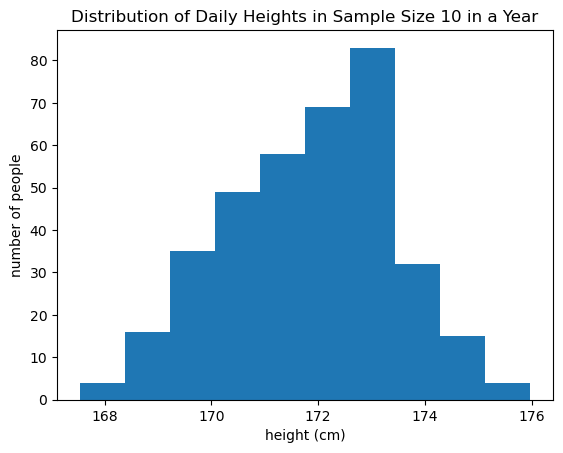

In [24]:
_ = plt.hist(daily_mean, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of Daily Heights in Sample Size 10 in a Year')

The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately 1.58.

__Q9:__ Verify the above results from the CLT.

__A:__

In [25]:
# Recall the population mean height is 172 cm and population standard deviation is 5 cm.
np.mean(daily_mean)

171.8660049358649

In [26]:
np.std(daily_mean)

1.5756704135286475

**Note:**

The mean of the sample distribution is 171.87cm compared to the population mean of 172 cm. The standard deviation of the sample distribution is 1.576cm compared to the 1.58 of the population. This shows that the Central Limit Theorem does indeed tell us the expected mean of this distribution will be equal to the population mean, and standard deviation. 

Remember, in this instance, we knew our population parameters, that the average height really is 172 cm and the standard deviation is 5 cm, and we see some of our daily estimates of the population mean were as low as around 168 and some as high as 176.

__Q10:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year)! Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

__A:__

In [27]:
sample_size_50_daily_mean = []
seed(47)
# calculate daily means from the larger sample size here
for i in range(365):
    sample_size_50_daily_mean.append(np.mean(townsfolk_sampler(50)))
    

In [28]:
sample_size_50_daily_mean[:5]

[172.7815108576788,
 172.79757492503552,
 172.9396310954854,
 173.3542075784445,
 171.1485580390421]

In [29]:
print("The daily mean for a sample size of 50 people is: ", np.mean(sample_size_50_daily_mean))

The daily mean for a sample size of 50 people is:  171.94366080916114


In [30]:
print("The daily standard deviation for a sample size of 50 people is: ", np.std(sample_size_50_daily_mean))

The daily standard deviation for a sample size of 50 people is:  0.6736107539771146


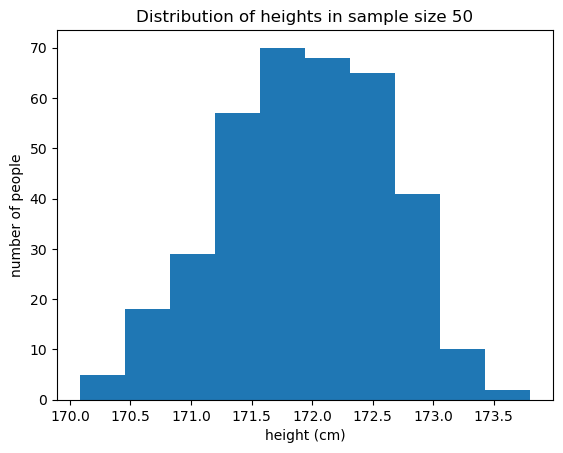

In [31]:
_ = plt.hist(sample_size_50_daily_mean, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 50')

**What we've seen so far, then, is that we can estimate population parameters from a sample from the population, and that samples have their own distributions. Furthermore, the larger the sample size, the narrower are those sampling distributions.**

### Normally testing time!

All of the above is well and good. We've been sampling from a population we know is normally distributed, we've come to understand when to use $n$ and when to use $n-1$ in the denominator to calculate the spread of a distribution, and we've  seen the Central Limit Theorem in action for a sampling distribution. All seems very well behaved in Frequentist land. But, well, why should we really care?

Remember, we rarely (if ever) actually know our population parameters but we still have to estimate them somehow. If we want to make inferences to conclusions like "this observation is unusual" or "my population mean has changed" then we need to have some idea of what the underlying distribution is so we can calculate relevant probabilities. In frequentist inference, we use the formulae above to deduce these population parameters. Take a moment in the next part of this assignment to refresh your understanding of how these probabilities work.

Recall some basic properties of the standard normal distribution, such as that about 68% of observations are within plus or minus 1 standard deviation of the mean. Check out the precise definition of a normal distribution on p. 394 of *AoS*. 

__Q11:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

__A:__

The standard normal distribution has a mean of 0 and a standard deviation of 1. The distribution is symmetric and bell-shaped, with 68% of the observations falling within one standard deviation of the mean, 95% of the observations falling within two standard deviations of the mean, and 99.7% of the observations falling within three standard deviations of the mean.

To calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution, we need to find the area under the curve to the left of 1 on the standard normal distribution.

Using a standard normal distribution table or calculator, we can find that the z-score corresponding to 1 is 0.8413. This means that the area under the curve to the left of 1 is 0.8413.

Therefore, the probability of observing the value 1 or less in a single observation from the standard normal distribution is approximately 0.8413. This is because the area under the curve to the left of 1 represents the proportion of observations in the standard normal distribution that are less than or equal to 1 standard deviation from the mean.

Calculating this probability involved calculating the area under the curve from the value of 1 and below. To put it in mathematical terms, we need to *integrate* the probability density function. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above). One way to do this is to look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

__Q12:__ Use the cdf() function to answer the question above again and verify you get the same answer.

__A:__

In [32]:
norm.cdf(1)

0.8413447460685429

**Note:**

The **CDF** of a probability distribution **_gives the probability that a random variable is less than or equal to a certain value._** In the case of the normal distribution, the CDF is used to find the probability that a random variable is less than or equal to a given value of x, assuming that the random variable follows a normal distribution with a given mean and standard deviation.

__Q13:__ Using our knowledge of the population parameters for our townsfolks' heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

__A:__

**Note:**

The **_norm.cdf(x, loc=0, scale=1)_** function takes three arguments:

**x:** the value of the random variable for which we want to calculate the cumulative probability.

**loc:** the mean of the normal distribution. This parameter is optional and defaults to 0.

**scale:** the standard deviation of the normal distribution. This parameter is optional and defaults to 1.

In [33]:
norm.cdf(x=177, loc=172, scale=5)

0.8413447460685429

__Q14:__ Turning this question around — suppose we randomly pick one person and measure their height and find they are 2.00 m tall. How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability. 

__A:__

In [34]:
norm.pdf(x=200, loc=172, scale=5)

1.2365241000331715e-08

**Note:**

The **PDF** of a probability distribution **_gives the relative likelihood of observing a certain value of the random variable.__** In the case of the normal distribution, the PDF is used to find the probability density at a given value of x, assuming that the random variable follows a normal distribution with a given mean and standard deviation.

The **_norm.pdf(x, loc=0, scale=1)_** function takes three arguments:

**x:** the value of the random variable for which we want to calculate the probability density.

**loc:** the mean of the normal distribution. This parameter is optional and defaults to 0.

**scale:** the standard deviation of the normal distribution. This parameter is optional and defaults to 1.
The output of the norm.pdf() function is the probability density at the given value of x.

What we've just done is calculate the ***p-value*** of the observation of someone 2.00m tall (review *p*-values if you need to on p. 399 of *AoS*). We could calculate this probability by virtue of knowing the population parameters. We were then able to use the known properties of the relevant normal distribution to calculate the probability of observing a value at least as extreme as our test value.

We're about to come to a pinch, though. We've said a couple of times that we rarely, if ever, know the true population parameters; we have to estimate them from our sample and we cannot even begin to estimate the standard deviation from a single observation. 

This is very true and usually we have sample sizes larger than one. This means we can calculate the mean of the sample as our best estimate of the population mean and the standard deviation as our best estimate of the population standard deviation. 

In other words, we are now coming to deal with the sampling distributions we mentioned above as we are generally concerned with the properties of the sample means we obtain. 

Above, we highlighted one result from the CLT, whereby the sampling distribution (of the mean) becomes narrower and narrower with the square root of the sample size. We remind ourselves that another result from the CLT is that _even if the underlying population distribution is not normal, the sampling distribution will tend to become normal with sufficiently large sample size_. (**Check out p. 199 of AoS if you need to revise this**). This is the key driver for us 'requiring' a certain sample size, for example you may frequently see a minimum sample size of 30 stated in many places. In reality this is simply a rule of thumb; if the underlying distribution is approximately normal then your sampling distribution will already be pretty normal, but if the underlying distribution is heavily skewed then you'd want to increase your sample size.

__Q15:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use the random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf()) Recall that the ***margin of error*** is mentioned on p. 189 of the *AoS* and discussed in depth in that chapter). 
* Calculate the 95% Confidence Interval of the mean (***confidence intervals*** are defined on p. 385 of *AoS*) 
* Does this interval include the true population mean?

__A:__

In [35]:
# Use the random seed of 47, to randomly sample the heights of 50 townsfolk
seed(47)
# take your sample now
sample_50_height = townsfolk_sampler(50)

In [36]:
# Estimate the population mean using np.mean
sample_mean_height = np.mean(sample_50_height)
print(sample_mean_height)

172.7815108576788


In [37]:
# Estimate the population standard deviation using np.std (remember which denominator to use!)
sample_std_height = np.std(sample_50_height, ddof=1)
print(sample_std_height)

4.195424364433547


**Note:**

The **PPF** of a probability distribution **_gives the value of the random variable for which the cumulative probability is equal to a certain value._** In other words, the PPF is the inverse of the CDF. **__In the case of the normal distribution, the PPF is used to find the value of the random variable at which the cumulative probability is equal to a given probability, assuming that the random variable follows a normal distribution with a given mean and standard deviation.__**

The __*norm.ppf(q, loc=0, scale=1)__* function takes three arguments:

**q:** the cumulative probability for which we want to find the corresponding value of the random variable.

**loc:** the mean of the normal distribution. This parameter is optional and defaults to 0.

**scale:** the standard deviation of the normal distribution. This parameter is optional and defaults to 1.

The output of the norm.ppf() function is the value of the random variable at which the cumulative probability is equal to the given probability.

**Note:**

To calculate the margin of error use this formula:

z * (stddev / sqrt(n))


where z is the z-score corresponding to the desired level of confidence (1.96 for 95% confidence), stddev is the estimated standard deviation of the population (4.195424364433547 in this case), and n is the sample size (50 in this case). Plugging in the numbers, you get:

In [38]:
# Calculate the (95%) margin of error (use the exact critial z value to 2 decimal places - look this up or use norm.ppf()) 

z_critical_value = norm.ppf(0.975)
print("The z-score corresponding to 95% confidence interval is: ",z_critical_value)

sample_margin_of_error = z_critical_value * (sample_std_height/np.sqrt(50))
print("The sample margin of error is: ", sample_margin_of_error)

The z-score corresponding to 95% confidence interval is:  1.959963984540054
The sample margin of error is:  1.1628909342876539


To calculate the 95% confidence interval of the mean, you can use the formula:

**CI = x̄ ± z*(σ/√n)**

Where **CI** is the confidence interval, **x̄** is the sample mean, **z** is the z-score corresponding to the desired level of confidence (1.96 for 95% confidence), **σ** is the population standard deviation (if known), or the sample standard deviation (if estimating), and n is the sample size.

In [39]:
# Calculate the 95% Confidence Interval of the mean.
sample_confidence_interval = (sample_mean_height - sample_margin_of_error, sample_mean_height + sample_margin_of_error)
print("We can be 95% confident that the true population mean height falls within this range: ", sample_confidence_interval)

We can be 95% confident that the true population mean height falls within this range:  (171.61861992339115, 173.94440179196644)


__Q16:__ Above, we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

__A:__

*When calculating a confidence interval using the critical z value, we are assuming that the sample size is sufficiently large and that the population standard deviation is known. If either of these assumptions is not met, the resulting confidence interval may not be accurate.*

*In practice, the population standard deviation is often not known, and must be estimated from the sample data. When the sample size is small (typically less than 30), using the critical z value to calculate the confidence interval can result in a wide interval that overestimates the precision of the estimate. In this case, it is more appropriate to use a t-distribution to calculate the confidence interval.*

*Additionally, if the sample is not drawn randomly from the population, or if there is non-response or other sources of bias in the sample selection, the resulting confidence interval may not be representative of the true population parameter.*

*Therefore, it is important to carefully consider the assumptions and limitations of the statistical method used to calculate the confidence interval, and to evaluate the potential sources of bias or error in the data collection process.*

__Q17:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

__A:__

The **_t-distribution is a probability distribution that is used when the population standard deviation is unknown and must be estimated from the sample._** The t-distribution has a bell shape like the normal distribution but has fatter tails, which makes it more appropriate for small sample sizes.

The **t.ppf() function takes two arguments:** the **_probability value (also called significance level or alpha)_** and **_the degrees of freedom._** The probability value represents the area under the t-distribution curve to the left of a certain t-value. **_The degrees of freedom depend on the sample size and are defined as n-1, where n is the sample size._**

The t.ppf() function returns the t-value that corresponds to the given probability value and degrees of freedom. In other words, **_it returns the value t such that the probability of observing a t-value less than or equal to t is equal to the given probability value._**

*In this case, the input probability is 0.975, which corresponds to the area under the t-distribution curve to the left of the critical value for a two-tailed 95% confidence interval. Since we want to find the critical value for the entire interval, we use 0.975 instead of 0.95, which is split evenly between the two tails.*

In [40]:
# Calculate the t-value for a 95% confidence interval with (50-1) 49 degrees of freedom
t_value = t.ppf(0.975, 49)
print(t_value)

2.009575234489209


**Note:**

To calculate the 95% confidence interval for the mean using the t-distribution, we need the following information:

Sample mean (x̄)

Sample standard deviation (s)

Sample size (n)

We can then use the following formula to calculate the confidence interval:


**CI = x̄ ± tα/2 * (s / sqrt(n))**

Where tα/2 is the t-value for the given level of confidence (0.025 for a two-tailed 95% confidence interval) and s / sqrt(n) is the standard error of the mean.

In [41]:
# Calculate the confidence interval using t-distribution
sample_t_margin_of_error = t_value * (sample_std_height/np.sqrt(50))

In [42]:
sample_t_confidence_interval = (sample_mean_height - sample_t_margin_of_error, sample_mean_height + sample_t_margin_of_error)
print("We can be 95% confident that the true population mean height falls within this range: ", sample_t_confidence_interval)

We can be 95% confident that the true population mean height falls within this range:  (171.589184447403, 173.9738372679546)


This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.

## 4. Learning outcomes

Having completed this project notebook, you now have hands-on experience:
* sampling and calculating probabilities from a normal distribution
* identifying the correct way to estimate the standard deviation of a population (the population parameter) from a sample
* with sampling distribution and now know how the Central Limit Theorem applies
* with how to calculate critical values and confidence intervals